In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
df=pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 50000, and columns are 2.


In [4]:
#checking null values
df.isnull().sum()

,0
review,0
sentiment,0


In [5]:
# Find Duplicate
df.duplicated().sum()

np.int64(418)

checking if there is an imbalanced class


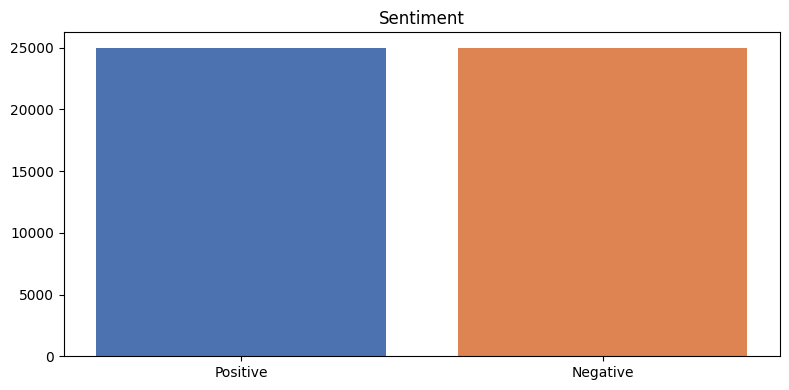

In [6]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.show()

In [7]:
print(df.value_counts('sentiment'))

sentiment
negative    25000
positive    25000
Name: count, dtype: int64


# Text Preprocessing


In [8]:
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)  # remove HTML
    text = re.sub(r"[^a-z\s]", "", text)  # keep only letters
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_review'] = df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df['cleaned_review']

,cleaned_review
0,one reviewers mentioned watching oz episode yo...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically theres family little boy jake thinks...
4,petter matteis love time money visually stunni...
...,...
49995,thought movie right good job wasnt creative or...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary schools n...
49998,im going disagree previous comment side maltin...


## convert to numerical features

In [10]:
#we want to identify unique/representative words for positive reviews and negative reviews, so we’ll choose the TF-IDF.
# To turn text data into numerical vectors with TF-IDF

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']


## Splitting data into train and test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **Training The Model**

### Logistic Regression model

In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

## Naive Bayes model

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)

GaussianNB()

## Model Evaluation

In [14]:
print(log_reg.score(X_train, y_train))
print(gnb.score(X_train.toarray(), y_train))

0.91325
0.8329


 Logistic Regression perform better than the Naive Bayes model so we are going to work with logistic regression

In [15]:
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.8892

## Classification report

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test,
                            y_pred,
                            labels = ['positive','negative']))

              precision    recall  f1-score   support

    positive       0.88      0.90      0.89      5039
    negative       0.90      0.87      0.89      4961

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## confustion matrix

To report the number of false positives, false negatives, true positives, and true negatives

In [18]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,
                           y_pred,
                           labels = ['positive', 'negative'])
conf_mat

array([[4552,  487],
       [ 621, 4340]])

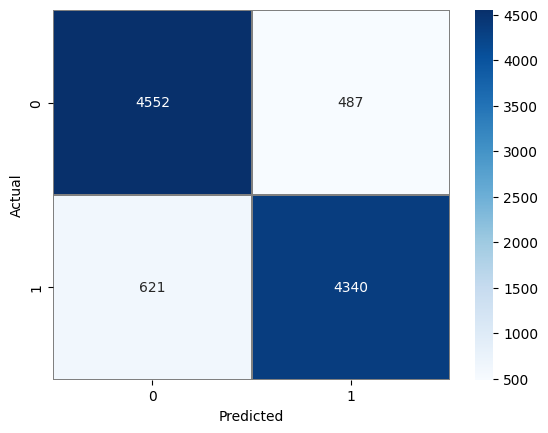

In [19]:
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Blues',cbar=True,linecolor="gray",linewidths=0.1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Visualizing the most frequent positive and negative words**

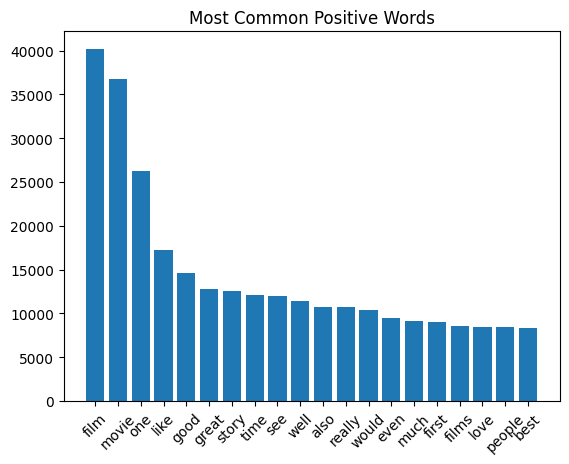

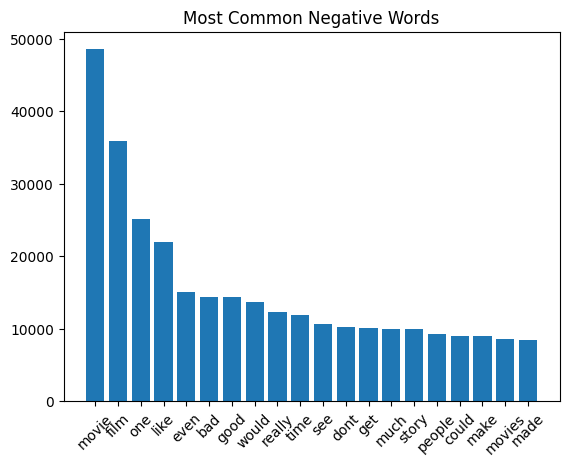

In [22]:
from collections import Counter
import matplotlib.pyplot as plt

pos_words = " ".join(df[df['sentiment']=='positive']['cleaned_review']).split()
neg_words = " ".join(df[df['sentiment']=='negative']['cleaned_review']).split()

pos_common = Counter(pos_words).most_common(20)
neg_common = Counter(neg_words).most_common(20)

# Plot positive
plt.bar([w for w, c in pos_common], [c for w, c in pos_common])
plt.title("Most Common Positive Words")
plt.xticks(rotation=45)
plt.show()

# Plot negative
plt.bar([w for w, c in neg_common], [c for w, c in neg_common])
plt.title("Most Common Negative Words")
plt.xticks(rotation=45)
plt.show()
